<a href="https://colab.research.google.com/github/gabrielbklopes/AICodes/blob/main/desafio_final_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
import scipy.optimize as curve_fit
from sklearn.tree import DecisionTreeRegressor
import scipy 
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nome_do_arquivo = "cars.csv"
dataset = pd.read_csv(nome_do_arquivo)

In [ ]:
dataset.head(20)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
bool_series = pd.notnull(dataset["weightlbs"])
dataset[bool_series]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [ ]:
dataset.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

In [ ]:
dataset_new = dataset
dataset_new.head(20)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [ ]:
dataset_new['cubicinches'] = pd.to_numeric(dataset_new['cubicinches'], errors='coerce')
dataset_new['weightlbs'] = pd.to_numeric(dataset_new['weightlbs'], errors='coerce')
dataset_new.isnull().sum()


mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [ ]:
dataset_new['weightlbs'].fillna((dataset_new['weightlbs'].mean()), inplace=True)
dataset_new['cubicinches'].fillna((dataset_new['cubicinches'].mean()), inplace=True)


In [ ]:
dataset_new.mean()

mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs      3009.833333
time-to-60       15.547893
year           1976.819923
dtype: float64

In [ ]:
dataset_new.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
dataset_new.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
dataset_new['mpg'].median()

22.0

In [ ]:
dataset_new.corr()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776710,-0.802379,-0.774905,-0.823800,0.509070,0.550441
cylinders,-0.776710,1.000000,0.951246,0.845155,0.894447,-0.578161,-0.322239
cubicinches,-0.802379,0.951246,1.000000,0.906413,0.925288,-0.610679,-0.349743
hp,-0.774905,0.845155,0.906413,1.000000,0.857125,-0.744873,-0.383869
weightlbs,-0.823800,0.894447,0.925288,0.857125,1.000000,-0.477240,-0.278683
time-to-60,0.509070,-0.578161,-0.610679,-0.744873,-0.477240,1.000000,0.312311
year,0.550441,-0.322239,-0.349743,-0.383869,-0.278683,0.312311,1.000000


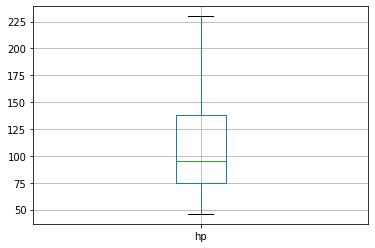

In [ ]:
dataset_new.boxplot(['hp'])

In [ ]:
dataset_new3 = dataset_new.drop(['brand'], axis=1)

In [ ]:
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#s_scaler = preprocessing.StandardScaler()
dataset_new2_s = StandardScaler().fit_transform(dataset_new3)

In [ ]:
print(dataset_new2_s)

[[-1.17112732  1.39305285  1.37239295 ...  1.41499703 -1.22128734
  -1.32753906]
 [ 1.12122635 -0.91910482 -1.03028992 ... -1.28008557 -0.53282946
   0.8758803 ]
 [-0.78693397  1.39305285  0.93052024 ...  0.51820947 -1.56551627
  -1.60296648]
 ...
 [-0.14661172  0.23697401  0.28612253 ... -0.20630047 -0.18860053
   1.70216257]
 [-0.65886952  0.23697401  0.28612253 ...  0.32823211  0.15562841
  -1.32753906]
 [-0.14661172  0.23697401  0.4518248  ...  0.40493105 -0.18860053
   0.04959804]]


In [ ]:
dataset_new2_s = pd.DataFrame(dataset_new2_s)

In [ ]:
#dataset_new2_s.head(50)
dataset_new2_s.head()

,0,1,2,3,4,5,6
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [ ]:
#mpg	cylinders	cubicinches	hp	weightlbs	time-to-60	year
dataset_new2_s.set_axis(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year'], axis=1, inplace=False)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025
...,...,...,...,...,...,...,...
256,-0.786934,1.393053,0.958137,0.584822,0.979583,-0.188601,0.875880
257,1.659097,-0.919105,-1.011879,-1.146896,-1.427584,0.155628,0.600453
258,-0.146612,0.236974,0.286123,0.139523,-0.206300,-0.188601,1.702163
259,-0.658870,0.236974,0.286123,-0.157343,0.328232,0.155628,-1.327539


In [ ]:
print(dataset_new2_s[(3)].max())


3.05870398977614


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(dataset_new2_s)
#principalDf = pd.DataFrame(data= principalComponents, columns=['principal component 1', 'principal component 2'])


In [ ]:
principalDf = pd.DataFrame(principalComponents)

In [ ]:
principalDf.head(50)

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958
5,1.449778,-1.588722,0.950710,0.742082,-0.196737,0.097858,-0.169286
6,3.314567,0.009404,0.241777,0.027594,0.022258,-0.207515,0.045707
7,4.793378,0.531764,-1.124946,0.479539,0.736392,0.126695,-0.277913
8,-1.050627,-0.883101,1.452750,-0.074926,0.218011,-0.436406,-0.096664
9,-2.946682,-0.974459,-0.558787,0.448091,-0.031856,-0.081806,0.004353


In [ ]:
pca.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

In [ ]:
entradas = [0, 1, 2]
x = dataset_new2_s[entradas]

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [ ]:
y_kmeans

array([1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2],
      dtype=int32)

In [ ]:
dataset_new2_s["Cluster"] = y_kmeans
dataset_new2_s.head(50)

,0,1,2,3,4,5,6,Cluster
0,-1.171127,1.393053,1.372393e+00,1.450681,1.414997,-1.221287,-1.327539,1
1,1.121226,-0.919105,-1.030290e+00,-0.874768,-1.280086,-0.532829,0.875880,0
2,-0.786934,1.393053,9.305202e-01,0.832210,0.518209,-1.565516,-1.602966,1
3,-1.043063,1.393053,1.832677e+00,1.079598,0.886364,-1.909745,-1.602966,1
4,0.941936,-0.919105,-9.474388e-01,-1.072679,-1.131408,0.499857,0.325025,0
5,-0.018547,1.393053,1.372393e+00,0.461128,1.050382,0.499857,0.875880,1
6,-1.299192,1.393053,1.381599e+00,1.277509,1.596715,-0.877058,-0.776684,1
7,-1.171127,1.393053,2.200904e+00,2.687622,1.536535,-2.253974,-1.602966,1
8,0.288807,-0.341065,-1.649559e-01,-0.726336,0.613788,1.532544,0.875880,2
9,1.864000,-0.919105,-1.030290e+00,-1.097418,-1.132588,0.499857,1.426735,0


In [ ]:
dataset_new2_s.columns = ['mpg',	'cylinders',	'cubicinches',	'hp',	'weightlbs',	'time-to-60',	'year', 'Cluster']

In [ ]:
dataset_new2_s['eficiency'] = np.where(dataset_new2_s['mpg'] > 25, 1, 0)

In [ ]:
dataset_new2_s.head(25)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Cluster,eficiency
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539,1,0
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880,0,0
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966,1,0
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966,1,0
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025,0,0
5,-0.018547,1.393053,1.372393,0.461128,1.050382,0.499857,0.875880,1,0
6,-1.299192,1.393053,1.381599,1.277509,1.596715,-0.877058,-0.776684,1,0
7,-1.171127,1.393053,2.200904,2.687622,1.536535,-2.253974,-1.602966,1,0
8,0.288807,-0.341065,-0.164956,-0.726336,0.613788,1.532544,0.875880,2,0
9,1.864000,-0.919105,-1.030290,-1.097418,-1.132588,0.499857,1.426735,0,0


In [ ]:
dataset_new['eficiency'] = np.where(dataset_new['mpg'] > 25, 1, 0)

In [ ]:
#dataset_new.head(25)
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
 8   eficiency    261 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 18.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split

entrada = ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']
saida = ['eficiency']

x = dataset_new[entrada]
y = dataset_new[saida]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

y_predict = clf_dt.predict(x_test)

acuracia = accuracy_score(y_test, y_predict)
print('Acurácia do Decision Tree: ',acuracia)

Acurácia do Decision Tree:  0.8734177215189873


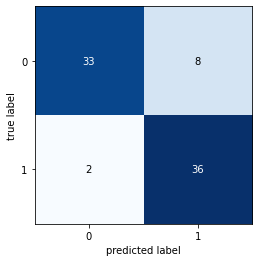

In [ ]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_predict)


#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
clf_LR = LogisticRegression(random_state=42)
clf_LR.fit(x_train, y_train)

y_predict_LR = clf_LR.predict(x_test)

acuracia_LR = accuracy_score(y_test, y_predict_LR)
print('A acuracia do Logistic Regression:', acuracia_LR)

A acuracia do Logistic Regression: 0.8607594936708861


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
